In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
df = pd.read_pickle("./ignore/rev100k_2.pkl")

In [28]:
rdf = df[['NORAD_CAT_ID','EPOCH','REV_AT_EPOCH', 'GP_ID']]

In [38]:
def do_thing(gdf):
    gdf = gdf.sort_values("EPOCH")
    gdf['REV_AT_EPOCH_DIFF'] = gdf.REV_AT_EPOCH.diff()
    mask = (gdf.REV_AT_EPOCH==10000) & (gdf.REV_AT_EPOCH_DIFF < -80000)
    mask = pd.concat([mask.shift(n) for n in range(-5,6)], axis=1).any(axis=1)
#     df[pd.concat([df.category.shift(-i)=='A' for i in range(n)], axis=1).any(axis=1)]
    return gdf[mask].set_index("GP_ID")
rrdf = rdf.groupby(by="NORAD_CAT_ID").apply(do_thing)


# for x,xdf in rdf[rdf.NORAD_CAT_ID==116].groupby(by="NORAD_CAT_ID"):
#     display(do_thing(xdf))
#     break

In [44]:
rrdf[rrdf.REV_AT_EPOCH_DIFF < -80000].sort_values("REV_AT_EPOCH_DIFF")

,,NORAD_CAT_ID,EPOCH,REV_AT_EPOCH,REV_AT_EPOCH_DIFF
NORAD_CAT_ID,GP_ID,,,,
11693,1781143,11693,2001-12-26T22:30:47.481120,10000,-89999.0
3911,90309578,3911,2012-08-27T16:58:00.632927,10000,-89999.0
17144,67808450,17144,2008-09-04T22:50:49.260192,10000,-89999.0
3558,69205402,3558,2008-12-09T13:15:31.802688,10000,-89999.0
13367,101001,13367,2001-05-03T22:59:29.095296,10000,-89998.0
...,...,...,...,...,...
4932,78897154,4932,2010-08-01T23:33:53.691552,10000,-89981.0
23261,78341170,23261,2010-06-21T23:43:26.771519,10000,-89957.0
20349,99469960,20349,2015-06-11T10:05:50.690976,10000,-84206.0


In [41]:
rrdf.to_csv("./ignore/rev_rollover.csv")

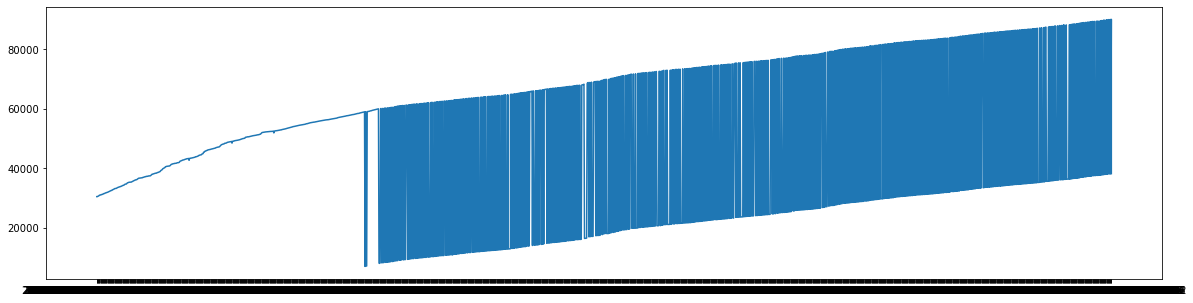

In [27]:
norad_cat_id = 36304
tdf = df[df.NORAD_CAT_ID==norad_cat_id]

fig,ax = plt.subplots(figsize=(20,5))
ax.plot(tdf.EPOCH, tdf.REV_AT_EPOCH)
plt.show()